## box plot

* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* box-and-whisker plot, box-and-whisker diagram

* <a href='https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC'>상자 수염 그림 - 위키백과, 우리 모두의 백과사전</a>

* 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
* 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.




1. 최솟값
2. 제 1사분위수
3. 제 2사분위수( ), 즉 중앙값
4. 제 3 사분위 수( )
5. 최댓값


* 더 읽어보기 : <a href='https://boxnwhis.kr/2019/02/19/boxplot.html'>박스 플롯에 대하여 :: -[|]- Box and Whisker</a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
# 한글폰트 사용시 그래프에서 마이너스 폰트 깨지는 문제 해결
mpl.rcParams['axes.unicode_minus'] = False

In [12]:
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.head()

,A,B,C,D,E
0,0.320819,0.850939,0.711648,0.851896,0.003198
1,0.357967,0.622808,0.601001,0.769170,0.948180
2,0.805521,0.261196,0.403851,0.830497,0.029195
3,0.581479,0.888664,0.018743,0.665399,0.997574
4,0.713394,0.017431,0.601547,0.768384,0.181330


In [10]:
# 요약된 수치

df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.408803,0.545402,0.550389,0.386926,0.296316
std,0.274187,0.221352,0.392576,0.297023,0.292293
min,0.042298,0.179980,0.019097,0.089144,0.012401
25%,0.245728,0.394750,0.137807,0.147031,0.097190
50%,0.322318,0.527804,0.678098,0.299909,0.196605
75%,0.553629,0.688915,0.900360,0.503835,0.428980
max,0.891132,0.947613,0.987518,0.884676,0.824796


### box plot 기본 예제

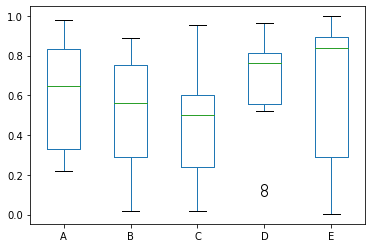

In [13]:
# box plot은 요약 수치를 기반으로 그림

df.plot.box()

### 기본 + 색상, 이상치

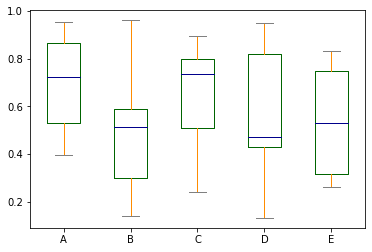

In [8]:
# sym : 이상치 표시를 어떻게 할 것인가? 기본은 동그라미

# 박스는 DarkGreen, 수염은 DarkOrange

color = {
    'boxes': 'DarkGreen',
    'whiskers': 'DarkOrange',
    'medians': 'DarkBlue',
    'caps': 'Gray'
}

df.plot.box(color=color, sym='r+')

### 기본 + 축 변경

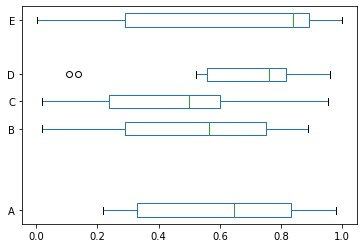

In [14]:
# 박스플롯의 축을 변경하여 작성

df.plot.box(vert=False, positions=[1, 4, 5, 6, 8])

### 기본 + grid

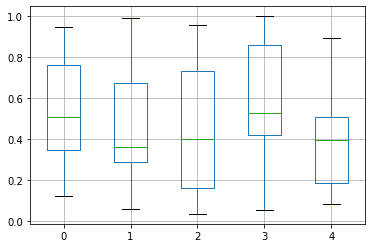

In [15]:
# plt.figure() : grid 그려줌

df = pd.DataFrame(np.random.rand(10, 5))
plt.figure();
bp = df.boxplot()

### 기본 + group

In [17]:
df = pd.DataFrame(np.random.rand(10, 2), columns=['Col1', 'Col2'])
df.head()

,Col1,Col2
0,0.097020,0.789159
1,0.488783,0.689878
2,0.483895,0.967146
3,0.706225,0.417394
4,0.173842,0.095049


In [22]:
# x 라는 컬럼을 만들어 그룹의 개념으로 사용할 컬럼을 하나 삽입

df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B'])
df

,Col1,Col2,X
0,0.097020,0.789159,A
1,0.488783,0.689878,A
2,0.483895,0.967146,A
3,0.706225,0.417394,A
4,0.173842,0.095049,A
5,0.050663,0.026204,B
6,0.179128,0.839905,B
7,0.623259,0.081854,B
8,0.133388,0.206135,B
9,0.609219,0.068834,B


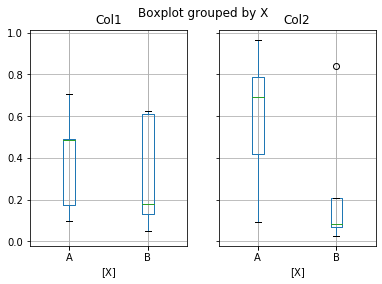

In [25]:
# 생성된 그룹 컬럼에 의한 그래프 작성

bp = df.boxplot(by='X')